In [3]:
import pandas as pd
meteorite_landings = pd.read_csv(r"C:\Users\srikr\Downloads\Meteorite_Landings.csv")

In [4]:
meteorite_landings

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [5]:
meteorite_landings.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [4]:
# Check for missing values
missing_values_meteorite_landings = meteorite_landings.isnull().sum()
print("Missing values before cleaning:\n", missing_values_meteorite_landings)


Missing values before cleaning:
 name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [5]:
# Fill missing values for specific columns
meteorite_landings_cleaned = meteorite_landings.copy()
meteorite_landings_cleaned['mass (g)'].fillna(meteorite_landings['mass (g)'].median(), inplace=True)
meteorite_landings_cleaned['year'].fillna(meteorite_landings['year'].mode()[0], inplace=True)
meteorite_landings_cleaned['reclat'].fillna(0, inplace=True)
meteorite_landings_cleaned['reclong'].fillna(0, inplace=True)

In [6]:
# Drop rows with remaining missing values if any
meteorite_landings_cleaned.dropna(inplace=True)



In [7]:
# Check for duplicates
duplicate_rows = meteorite_landings_cleaned[meteorite_landings_cleaned.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [8]:
# Remove duplicates
meteorite_landings_cleaned = meteorite_landings_cleaned.drop_duplicates()

In [9]:
# Verify cleaning
missing_values_meteorite_landings_cleaned = meteorite_landings_cleaned.isnull().sum()
duplicate_rows_after = meteorite_landings_cleaned.duplicated().sum()

print("Missing values after cleaning:\n", missing_values_meteorite_landings_cleaned)
print("Number of duplicate rows after cleaning:", duplicate_rows_after)

Missing values after cleaning:
 name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64
Number of duplicate rows after cleaning: 0


In [10]:
# Save the cleaned dataset
meteorite_landings_cleaned.to_csv(r'C:\Users\srikr\OneDrive\Desktop\CleanedDataForDataManipulations\cleaned_Meteorite_Landings.csv', index=False)
print("Cleaned dataset saved as 'cleaned_Meteorite_Landings.csv'")

Cleaned dataset saved as 'cleaned_Meteorite_Landings.csv'


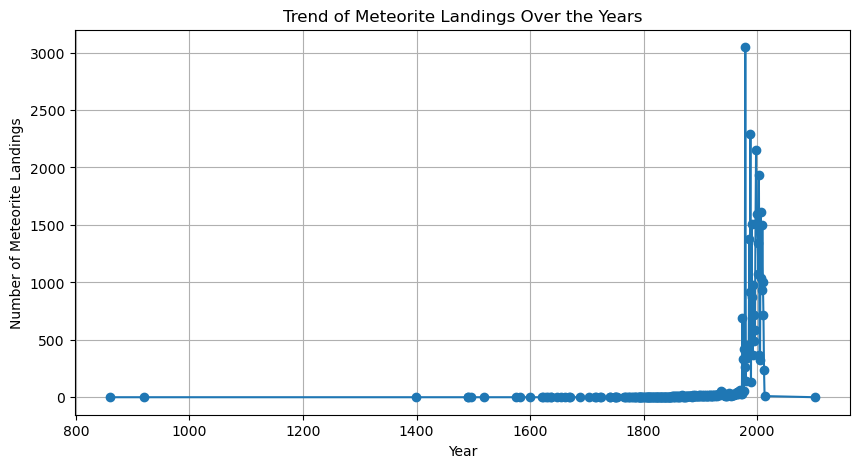

In [11]:
#  What is the trend of meteorite landings over the years?

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
meteorite_landings_cleaned = pd.read_csv(r'C:\Users\srikr\OneDrive\Desktop\CleanedDataForDataManipulations\cleaned_Meteorite_Landings.csv')

# Convert 'year' to numeric
meteorite_landings_cleaned['year'] = pd.to_numeric(meteorite_landings_cleaned['year'], errors='coerce')

# Temporal Analysis: Trend of meteorite landings over the years
yearly_meteorites = meteorite_landings_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_meteorites.index, yearly_meteorites.values, marker='o')
plt.title('Trend of Meteorite Landings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Meteorite Landings')
plt.grid(True)
plt.show()

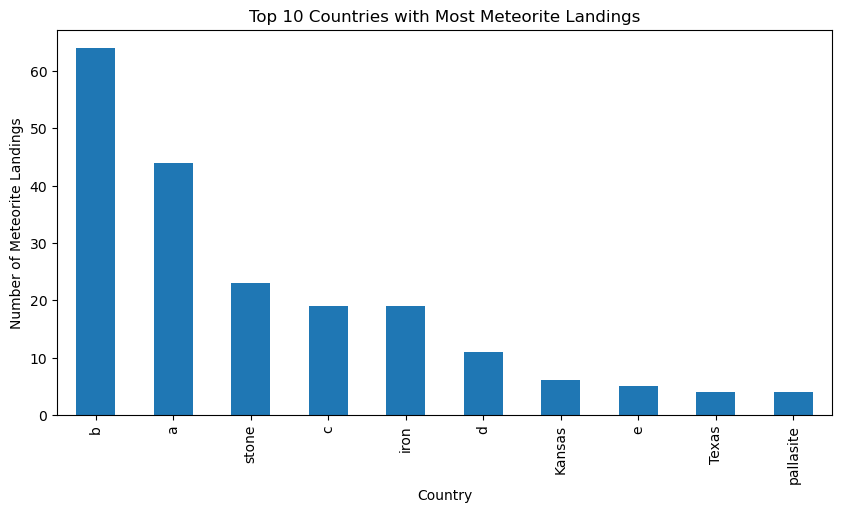

In [12]:
# Which countries have reported the highest number of meteorite landings?

# Geographical Analysis: Top 10 countries with most meteorite landings
# Extract the country name from the 'name' field (if applicable)
meteorite_landings_cleaned['country'] = meteorite_landings_cleaned['name'].str.extract(r'\((.*?)\)', expand=False)
country_meteorites = meteorite_landings_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
country_meteorites.plot(kind='bar')
plt.title('Top 10 Countries with Most Meteorite Landings')
plt.xlabel('Country')
plt.ylabel('Number of Meteorite Landings')
plt.show()


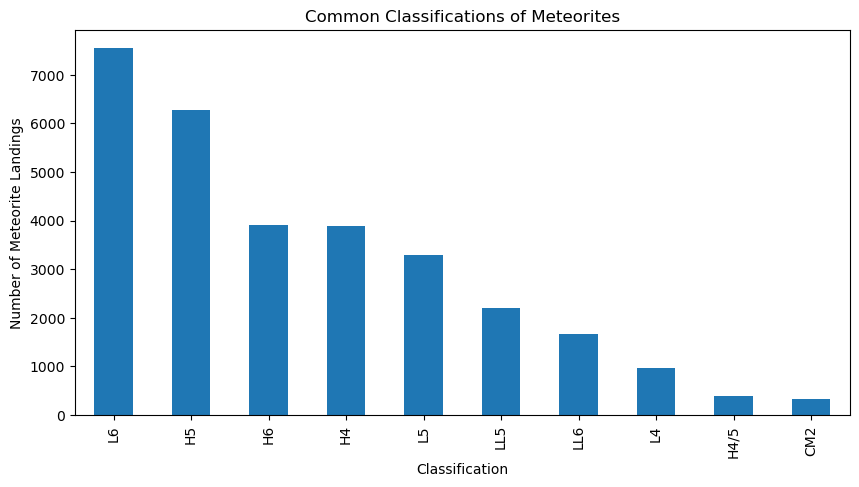

In [13]:
# What are the common classifications of meteorites?

# Classification Analysis: Common classifications of meteorites
classification_meteorites = meteorite_landings_cleaned['recclass'].value_counts().head(10)

plt.figure(figsize=(10, 5))
classification_meteorites.plot(kind='bar')
plt.title('Common Classifications of Meteorites')
plt.xlabel('Classification')
plt.ylabel('Number of Meteorite Landings')
plt.show()


In [17]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\srikr\OneDrive\Desktop\CleanedDataForDataManipulations\cleaned_Meteorite_Landings.csv'
df = pd.read_csv(file_path)

# Convert the `year` column to numeric values, coercing errors to NaN
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Define the valid range for years
min_year = 1800
max_year = pd.Timestamp.now().year

# Filter out rows with invalid years
df = df[(df['year'] >= min_year) & (df['year'] <= max_year)]

# Convert the `year` column to a proper date format (yyyy-01-01)
df['year_date'] = pd.to_datetime(df['year'].astype(int).astype(str) + '-01-01', format='%Y-%m-%d')

# Optionally, drop the original year column if no longer needed
# df.drop(columns=['year'], inplace=True)

# Save the updated dataset to a new CSV file
output_file_path = r'C:\Users\srikr\OneDrive\Desktop\CleanedDataForDataManipulations\cleaned_Meteorite_Landings_with_dates.csv'
df.to_csv(output_file_path, index=False)

print("Dataset with proper date format saved successfully.")


Dataset with proper date format saved successfully.
